In [1]:
import netket as nk

nk.__version__


'3.7'

In [8]:
hi = nk.hilbert.Spin(1/2)
hi

Spin(s=1/2, N=1)

In [11]:
nk.operator.spin.sigmaz(hi,0)

LocalOperator(dim=1, acting_on=[(0,)], constant=0.0, dtype=float64)

In [2]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.operators.commutators import anti_commutator

ImportError: cannot import name 'Qobj' from 'qiskit.qobj' (unknown location)

In [5]:
op1 = FermionicOp({"+_0 -_1": 1}, num_spin_orbitals=2)
op2 = FermionicOp({"-_1 +_2": 1}, num_spin_orbitals=3)

In [11]:
anti_commutator(FermionicOp({"+_0": 1}, num_spin_orbitals=1), FermionicOp({"-_0": 1}, num_spin_orbitals=1))

FermionicOp({'+_0 -_0': (1+0j), '-_0 +_0': (1+0j)}, num_spin_orbitals=1, )

In [20]:
a01 = anti_commutator(FermionicOp({"+_0": 1}, num_spin_orbitals=1), FermionicOp({"-_0": 1}, num_spin_orbitals=1))
a01.normal_order()

FermionicOp({'': (1+0j)}, num_spin_orbitals=1, )

In [8]:
anti_commutator(op1, op2)

FermionicOp({}, num_spin_orbitals=3, )

In [21]:
opx = FermionicOp({"+_0 -_1 +_1 -_3" : 1}, num_spin_orbitals=4)
op = FermionicOp(
    {
        "+_0 -_3": 1.0,
        "+_0 +_1 -_1 -_3": -1.0,
    },
    num_spin_orbitals=4,
)
opx.normal_order().equiv(op.normal_order())

True

In [3]:
from qiskit.extensions import UnitaryGate, XGate, IGate, CXGate
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector


import numpy as np

In [4]:
sv0 = Statevector.from_label('0')
sv1 = Statevector.from_label('1')
X = Operator(Pauli('X'))
(sv0.evolve(X)).equiv(sv1)

True

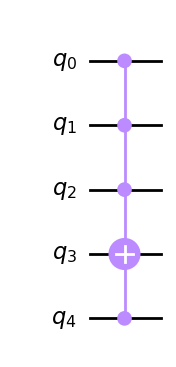

In [9]:
from qiskit.circuit.library import MCXGate, C3XGate
gate = MCXGate(4)

from qiskit import QuantumCircuit
circuit = QuantumCircuit(5)
circuit.append(gate, [0, 1, 4, 2, 3])
circuit.draw('mpl')

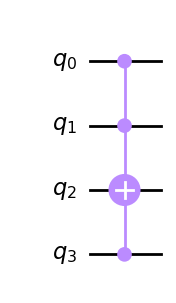

In [6]:
Gat = C3XGate()
cir = QuantumCircuit(4)
cir.append(Gat, [0, 1, 3, 2])
cir.draw('mpl')

$
\newcommand{\HH}{\mathtt{H}}  
\newcommand{\ad}{a^\dagger}  
\newcommand{\kb}[2]{|#1\rangle\langle#2|} 
\newcommand{\proj}[1]{|#1\rangle\langle#1|}
\newcommand{\bk}[2]{\langle#1|#2\rangle}
\newcommand{\ket}[1]{|#1\rangle}
$

Opérateur qubit             |  Description
----------------------------|---------------------
$\mathtt{I}$$=\begin{pmatrix}1 & 0 \\ 0 &1 \end{pmatrix}$ |Identité
$\mathtt{Q}^-$$=\begin{pmatrix}0 & 1 \\ 1 & 0 \end{pmatrix}$$=\frac12(\mathtt{X} + i\mathtt{Y}) =\kb{1}{0}$ | Annihilation 
$\mathtt{Q}^+$$=\begin{pmatrix}0 & 0 \\ 1 & 0 \end{pmatrix}$$=\frac12(\mathtt{X} - i\mathtt{Y}) =\kb{0}{1}$ | Création
$\mathtt{Q}^+\mathtt{Q}^-$$=\begin{pmatrix}0 & 0 \\ 0 &1 \end{pmatrix}$$=\frac12(\mathtt{I} - \mathtt{Z}) =\proj{1}$ | Un nombre (particule)
$\mathtt{Q}^-\mathtt{Q}^+$$=\begin{pmatrix}0 & 0 \\ 0 &1 \end{pmatrix}$$=\frac12(\mathtt{I} + \mathtt{Z}) =\proj{0}$ | Zéro nombre (trou)

Les opérateurs qubits sont antisymétriques: $\{\mathtt{Q}^,\mathtt{Q}^-\}$$=\mathtt{Q}^+\mathtt{Q}^- + \mathtt{Q}^-\mathtt{Q}^+ = \mathtt{I}$.

In [11]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [12]:
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

device = provider.get_backend('ibmq_5_yorktown')

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

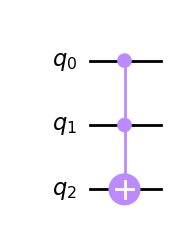

In [5]:
qc=QuantumCircuit(3)
qc.ccx(0,1,2)
new_circuit = transpile(qc,backend=device)
new_circuit.draw(output='mpl')

In [2]:
import pandas as pd

H2_data = pd.read_csv(f"Resultats/H2_results.csv")

H2_data

,Type of solver,Mapper,Optimizer,GS electr. energy,Rel. error (%),Elapsed time
VQE UCCSD Solver,PM,SPSA,-1.137039,0.0144,0:00:09.184951,NaN
Numpy Exact Solver,PM,SPSA,-1.137306,0.0144,0:00:00.060469,NaN
VQE UCCSD Solver,PM,SLSQP,-1.137306,0.0000,0:00:00.649761,NaN
Numpy Exact Solver,PM,SLSQP,-1.137306,0.0000,0:00:00.084372,NaN
VQE UCCSD Solver,PM,L_BFGS_B,-1.137306,0.0000,0:00:01.000260,NaN
Numpy Exact Solver,PM,L_BFGS_B,-1.137306,0.0000,0:00:00.056809,NaN
VQE UCCSD Solver,JWM,SPSA,-1.137005,0.0162,0:00:12.050602,NaN
Numpy Exact Solver,JWM,SPSA,-1.137306,0.0162,0:00:00.080007,NaN
VQE UCCSD Solver,JWM,SLSQP,-1.137306,0.0000,0:00:00.787174,NaN
Numpy Exact Solver,JWM,SLSQP,-1.137306,0.0000,0:00:00.080640,NaN


In [5]:
import ipysheet
sheet = ipysheet.sheet(rows=3, columns=4)
cell1 = ipysheet.cell(0, 0, 'Hello')
cell2 = ipysheet.cell(2, 0, 'World')
cell_value = ipysheet.cell(2,2, 42.)
print(sheet)

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='text', value='Hello'), Cell(column_end=0, column_start=0, row_end=2, row_start=2, type='text', value='World'), Cell(column_end=2, column_start=2, row_end=2, row_start=2, type='numeric', value=42.0)), layout=Layout(height='auto', width='auto'))


In [6]:
import ipywidgets as widgets
sheet = ipysheet.sheet(rows=3, columns=2, column_headers=False, row_headers=False)
cell_a = ipysheet.cell(0, 1, 1, label_left='a')
cell_b = ipysheet.cell(1, 1, 2, label_left='b')
cell_sum = ipysheet.cell(2, 1, 3, label_left='sum', read_only=True)

# create a slider linked to cell a
slider = widgets.FloatSlider(min=-10, max=10, description='a')
widgets.jslink((cell_a, 'value'), (slider, 'value'))

# changes in a or b should trigger this function
def calculate(change):
    cell_sum.value = cell_a.value + cell_b.value

cell_a.observe(calculate, 'value')
cell_b.observe(calculate, 'value')


widgets.VBox([sheet, slider])

## Qiskit_nature_pyscf version 0.6

In [5]:
from pyscf import gto, scf, mcscf

import numpy as np

from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.mappers import ParityMapper

from qiskit_nature_pyscf import QiskitSolver

mol = gto.M(atom="Li 0 0 0; H 0 0 1.6", basis="sto-3g")

h_f = scf.RHF(mol).run()

norb = 2
nalpha, nbeta = 1, 1
nelec = nalpha + nbeta

cas = mcscf.CASCI(h_f, norb, nelec)

mapper = ParityMapper(num_particles=(nalpha, nbeta))


ansatz = UCCSD(
    norb,
    (nalpha, nbeta),
    mapper,
    initial_state=HartreeFock(
        norb,
        (nalpha, nbeta),
        mapper,
    ),
)

vqe = VQE(Estimator(), ansatz, SLSQP())
vqe.initial_point = np.zeros(ansatz.num_parameters)

algorithm = GroundStateEigensolver(mapper, vqe)

cas.fcisolver = QiskitSolver(algorithm)

cas.run()

converged SCF energy = -7.86186476980865


TypeError: ParityMapper.__init__() got an unexpected keyword argument 'num_particles'

$\newcommand{\mel}[3]{\langle #1|#2|#3\rangle} %Matrix element$


$\mel{\psi(\theta)}{\mathtt{H}}{\psi(\theta)}$

In [3]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

# Use PySCF, a classical computational chemistry software
# package, to compute the one-body and two-body integrals in
# electronic-orbital basis, necessary to form the Fermionic operator
driver = PySCFDriver(
    atom='H .0 .0 .0; H .0 .0 0.735',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
)
problem = driver.run()

# setup the qubit mapper
from qiskit_nature.second_q.mappers import ParityMapper

mapper = ParityMapper(num_particles=problem.num_particles)

# setup the classical optimizer for the VQE
from qiskit.algorithms.optimizers import L_BFGS_B

optimizer = L_BFGS_B()

# setup the estimator primitive for the VQE
from qiskit.primitives import Estimator

estimator = Estimator()

# setup the ansatz for VQE
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

# set up our actual VQE instance
from qiskit.algorithms.minimum_eigensolvers import VQE

vqe = VQE(estimator, ansatz, optimizer)
# ensure that the optimizer starts in the all-zero state which corresponds to
# the Hartree-Fock starting point
vqe.initial_point = [0] * ansatz.num_parameters

# prepare the ground-state solver and run it
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

algorithm = GroundStateEigensolver(mapper, vqe)

electronic_structure_result = algorithm.solve(problem)
print(electronic_structure_result)

TypeError: ParityMapper.__init__() got an unexpected keyword argument 'num_particles'

In [3]:
'''
Response-theory calculation of the permanent dipole moment
'''

from pyscf import gto, scf, mcpdft
from pyscf.lib import logger

logger.TIMER_LEVEL = logger.INFO

# Energy calculation
h2co_xyz = '''C  0.534004  0.000000  0.000000
O -0.676110  0.000000  0.000000
H  1.102430  0.000000  0.920125
H  1.102430  0.000000 -0.920125'''
mol = gto.M (atom = h2co_xyz, basis = 'def2svp', symmetry = False,
             verbose = logger.INFO, output = '00-dipole_moment.log')
mf = scf.RHF (mol).run ()
mc = mcpdft.CASSCF (mf, 'tPBE', 6, 6)
mc.kernel ()

# Electric Dipole calculation
dipole = mc.dip_moment(unit='Debye')
print ("MC-PDFT electric dipole moment Debye")
print (" {:8.5f} {:8.5f} {:8.5f}".format (*dipole))
print ("Numerical MC-PDFT electric dipole moment from GAMESS [Debye]")
print (" 2.09361 0.00000 0.00000 ")

ImportError: cannot import name 'mcpdft' from 'pyscf' (/home/taamangtchu/mambaforge/envs/qiskit-env/lib/python3.10/site-packages/pyscf/__init__.py)

In [1]:
#!/usr/bin/env python

'''
Custom solvent cavity
'''

import numpy
from pyscf import gto, qmmm, solvent

#
# Case 1. Cavity for dummy atoms with basis on the dummy atoms
#
mol = gto.M(atom='''
C        0.000000    0.000000             -0.542500
O        0.000000    0.000000              0.677500
H        0.000000    0.9353074360871938   -1.082500
H        0.000000   -0.9353074360871938   -1.082500
X-C      0.000000    0.000000             -1.5
X-O      0.000000    0.000000              1.6
            ''',
            verbose = 4)

sol = solvent.ddCOSMO(mol)
cavity_radii = sol.get_atomic_radii()

cavity_radii[4] = 3.0  # Bohr, for X-C
cavity_radii[5] = 2.5  # Bohr, for X-O
# Overwrite the get_atom_radii method to feed the custom cavity into the solvent model
sol.get_atomic_radii = lambda: cavity_radii

mf = mol.RHF().ddCOSMO(sol)
mf.run()


#
# Case 2. Cavity for dummy atoms (without basis)
#
mol = gto.M(atom='''
C        0.000000    0.000000             -0.542500
O        0.000000    0.000000              0.677500
H        0.000000    0.9353074360871938   -1.082500
H        0.000000   -0.9353074360871938   -1.082500
            ''',
            verbose = 4)

# Use a MM molecule to define cavity from dummy atoms.
# See also the example 22-with_qmmm.py
coords = numpy.array([
    [0, 0, -1.5],
    [0, 0, 1.6],
])
charges = numpy.array([0, 0])
mm_atoms = [('X', c) for c in coords]
mm_mol = qmmm.create_mm_mol(mm_atoms, charges)

# Make a giant system include both QM and MM particles
qmmm_mol = mol + mm_mol

# The solvent model is based on the giant system
sol = solvent.ddCOSMO(qmmm_mol)
cavity_radii = sol.get_atomic_radii()

# Custom cavity
cavity_radii[4] = 3.0  # Bohr
cavity_radii[5] = 2.5  # Bohr
# Overwrite the get_atom_radii method to feed the custom cavity into the solvent model
sol.get_atomic_radii = lambda: cavity_radii

mf = mol.RHF().QMMM(coords, charges)
mf = mf.ddCOSMO(sol)
mf.run()

System: uname_result(system='Linux', node='taamangtchu-Aspire-A515-45', release='5.15.0-69-generic', version='#76-Ubuntu SMP Fri Mar 17 17:19:29 UTC 2023', machine='x86_64')  Threads 12
Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]
numpy 1.23.5  scipy 1.10.1
Date: Tue Apr  4 10:09:57 2023
PySCF version 2.2.0
PySCF path  /home/taamangtchu/mambaforge/envs/qiskit-env/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 6
[INPUT] num. electrons = 16
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      0.000000000000   0.000000000000  -0.542500000000 AA    0.000000000000   0.000000000000  -1.025176422577 Bohr   0.0
[INPUT]  2 O      0.000000000000   0.000000000000   0.677500000000

Overwritten attributes  get_atomic_radii  of <class 'pyscf.solvent.ddcosmo.DDCOSMO'>


<class 'pyscf.solvent.ddcosmo.DDCOSMO'> E_diel = -0.00267378816469371
init E= -112.516370905736
  HOMO = -0.239192470639866  LUMO = 0.111002440157271
<class 'pyscf.solvent.ddcosmo.DDCOSMO'> E_diel = -0.0249222024865844
cycle= 1 E= -112.240733258429  delta_E= 0.276  |g|= 0.621  |ddm|=  2.5
  HOMO = -0.210573374958553  LUMO = 0.246659732129141
<class 'pyscf.solvent.ddcosmo.DDCOSMO'> E_diel = -0.00134455471302569
cycle= 2 E= -112.332478754782  delta_E= -0.0917  |g|= 0.43  |ddm|= 1.13
  HOMO = -0.340640721311811  LUMO = 0.252792743372388
<class 'pyscf.solvent.ddcosmo.DDCOSMO'> E_diel = -0.00526816185398736
cycle= 3 E= -112.374350747759  delta_E= -0.0419  |g|= 0.0497  |ddm|= 0.417
  HOMO = -0.356842121834759  LUMO = 0.266096461864213
<class 'pyscf.solvent.ddcosmo.DDCOSMO'> E_diel = -0.00467523231693561
cycle= 4 E= -112.375937486534  delta_E= -0.00159  |g|= 0.0181  |ddm|= 0.11
  HOMO = -0.362387541838033  LUMO = 0.261198469485636
<class 'pyscf.solvent.ddcosmo.DDCOSMO'> E_diel = -0.0045013169

SCFWithSolvent-QMMM-RHF object of <class 'pyscf.solvent._attach_solvent._for_scf.<locals>.SCFWithSolvent'>

In [6]:
from pyscf import gto, scf, mcscf
from pyscf.mcscf import avas

mol = gto.M(
  atom="O 0 0 0.115; H 0 0.754 -0.459; H 0 -0.754 -0.459",
  basis="sto6g",
)

h_f = scf.RHF(mol).run()
# converged SCF energy = -75.6769190377958

norb, nel, mo = avas.avas(h_f,['O 2p', 'H 1s','H 1s'])

print(norb)
print(nel)

converged SCF energy = -75.6769190377957
6
8


In [2]:
import numpy
from pyscf import gto, scf, mcscf

'''
Scan BeH2 molecule symmetric dissociation curve
Note the CI wave function might change symmetry in the scanning.  Adjust
fcisolver parameters to maintain the right symmetry.
'''

def run(i, dm0, mo0, ci0):
    x = i
    y = (2.54 - 0.46 * x)
    x = x * 0.529177249
    y = y * 0.529177249
    mol = gto.M(
        verbose = 0,
        atom = [
            ['Be',( 0., 0.    , 0.   )],
            ['H', ( x, -y    , 0.    )],
            ['H', ( x,  y    , 0.    )],],
        basis = '6-311G',
        symmetry = True)

    mf = scf.RHF(mol)
    ehf = mf.scf(dm0)

    mc = mcscf.CASSCF(mf, 2, 2)
    mc.fcisolver.davidson_only = True # force the CI solver stick on (A1)^2(B1)^0 configuration
    if mo0 is not None:
        mo0 = mcscf.project_init_guess(mc, mo0)

    emc = mc.mc1step(mo0, ci0)[0]

    print('%2.1f bohr, HF energy: %12.8f, CASSCF energy: %12.8f' % (i, ehf, emc))
    return mf, mc

dm0 = mo0 = ci = None
for i in reversed(numpy.arange(1.0, 4.1, .1)):
    mf, mc = run(i, dm0, mo0, ci)
    dm0 = mf.make_rdm1()
    mo_coeff = mc.mo_coeff
    ci = mc.ci

4.0 bohr, HF energy: -15.67344865, CASSCF energy: -15.69352389
3.9 bohr, HF energy: -15.66822322, CASSCF energy: -15.68855503
3.8 bohr, HF energy: -15.66039293, CASSCF energy: -15.68100150
3.7 bohr, HF energy: -15.65057504, CASSCF energy: -15.67148772
3.6 bohr, HF energy: -15.63921946, CASSCF energy: -15.66047555
3.5 bohr, HF energy: -15.62665280, CASSCF energy: -15.64831118
3.4 bohr, HF energy: -15.61310917, CASSCF energy: -15.63526134
3.3 bohr, HF energy: -15.59875205, CASSCF energy: -15.62154602
3.2 bohr, HF energy: -15.58369007, CASSCF energy: -15.60738029
3.1 bohr, HF energy: -15.56798865, CASSCF energy: -15.59306220
3.0 bohr, HF energy: -15.55167904, CASSCF energy: -15.57929444
2.9 bohr, HF energy: -15.53476574, CASSCF energy: -15.56905970
2.8 bohr, HF energy: -15.51723309, CASSCF energy: -15.56916759
2.7 bohr, HF energy: -15.49905170, CASSCF energy: -15.57758411
2.6 bohr, HF energy: -15.48018517, CASSCF energy: -15.58932085
2.5 bohr, HF energy: -15.46059748, CASSCF energy: -15.6

In [3]:
from pandasgui import show

QSocketNotifier: Can only be used with threads started with QThread


In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast = load_breast_cancer()
breast_df = pd.DataFrame(breast.data, columns = breast.feature_names)
breast_df['target'] = breast.target
breast_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
show(breast_df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
PandasGUI INFO — pandasgui.gui — Opening PandasGUI
PandasGUI INFO — pandasgui.gui — Opening PandasGUI
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [11]:
BS = (Operator(Pauli('I')) + 1.j*Operator(Pauli('X')))/np.sqrt(2)
array_to_latex(BS)

<IPython.core.display.Latex object>

In [26]:
BS = (Operator(IGate()) + 1.j*Operator(XGate()))/np.sqrt(2)
array_to_latex(BS)

<IPython.core.display.Latex object>

In [24]:
array_to_latex(Operator(CXGate()))

<IPython.core.display.Latex object>

In [28]:
BS = UnitaryGate(BS,'BS')
PBS = UnitaryGate(BS,'PBS')
# array_to_latex(BS)

In [95]:
def BK(m):
    I = [[1, 0], [0, 1]]
    d = {}
    d[0] = [1]
    for k in range(0, m):
        B = np.kron(I,d[k])
        for l in range(2**k, 2**(k+1)):
            B[0,l] = 1
        d[k+1] = B
    return d


In [2]:
from sympy.physics.quantum import *
import numpy as np

In [3]:
psi = (Ket(00)+2*Ket(10)-2*Ket(11))/3
psi

(|0> + 2*|10> - 2*|11>)/3

In [2]:
from ase import Atoms
from ase.build import molecule
from ase.visualize import view

In [2]:
macro_ASE = Atoms('ONCHHHC', [(1.1280, 0.2091, 0.0000), 
                          (-1.1878, 0.1791, 0.0000), 
                          (0.0598, -0.3882, 0.0000),
                          (-1.3085, 1.1864, 0.0001),
                          (-2.0305, -0.3861, -0.0001),
                          (-0.0014, -1.4883, -0.0001),
                          (-0.1805, 1.3955, 0.0000)])

In [3]:
view(macro_ASE, viewer='x3d')

In [4]:
LiH_ASE = Atoms('LiH', [(0., 0., 0.), (0., 0., 1.5949)])
view(LiH_ASE, viewer='x3d')

In [2]:
from qutip import *

In [3]:
 basis(2,0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

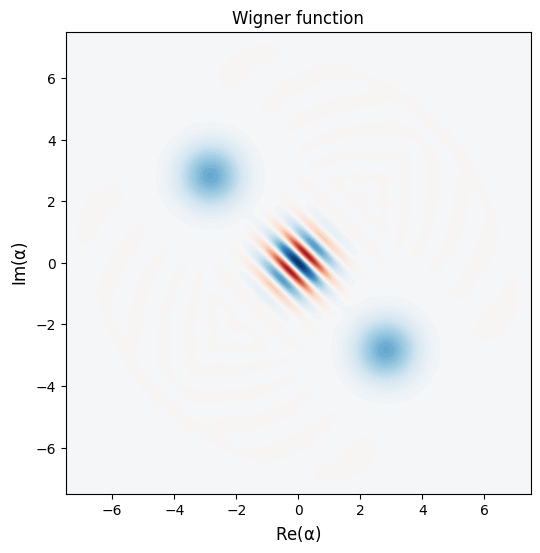

In [4]:
plot_wigner(coherent(25,-2+2j)+coherent(25,2-2j))

In [8]:
destroy(4)*create(4)*basis(4,3)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]

In [11]:
(create(4)*destroy(4)+1)*basis(4,3)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [4.]]

In [7]:
! pip install jupyter_nbextensions_configurator

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 KB 1.1 MB/s eta 0:00:001.0 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for jupyter_nbextensions_configurator: filename=jupyter_nbextensions_configurator-0.6.1-py2.py3-none-any.whl size=466844 sha256=24b9d654f22c3e0a1770767beb89e66d4a94d505e1caa1643ccb1db048e193d5
  Stored in directory: /home/taamangtchu/.cache/pip/wheels/f4/43/08/c89449c8e689d852e2e30163ca6a8dd08fe76ea80ec8f5eece
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17492 sha256=7b3f51e2fd28093e237560783af416397d180347a830e059ccf0de8c85c1ede1
  Stored in directory: /home/taamangtchu/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_nbextensions_configurator jupyter_contrib_core
  Consider adding this directory to 

In [8]:
! jupyter nbextensions_configurator enable --user

Enabling: jupyter_nbextensions_configurator
- Writing config: /home/taamangtchu/.jupyter
    - Validating...
      jupyter_nbextensions_configurator 0.6.1 OK
Enabling notebook nbextension nbextensions_configurator/config_menu/main...
Enabling tree nbextension nbextensions_configurator/tree_tab/main...
